In [1]:
%local-changes


I1029 144737.718 local_changes_provider.py:32] Initializing local changes support for repo_base_path='/data/sandcastle/boxes/fbsource'


W1029 144747.808 local_changes_magic.py:256] 
___________ Recommended Action ___________ 
Your current repo doesn't match the kernel commit.
While autoreload often functions as expected, ensuring consistency is key,
especially when your local repo significantly diverges from the kernel commit or you're tackling production workflows.
Consider one of the following options:

1) From commandline, run: hg checkout 69ec7f1997d51b9081567cf86f2d71e44c320e25 to develop without building a local kernel.
2) To develop in your current repo, first build the local kernel(e.g, bento kernel build bento/kernels:bento_kernel_~). Afterwards, iterate development using %local-changes.
___________________________________________ 



W1029 144747.809 local_changes_magic.py:428] 
___________________ FYI __________________ 
A debugger is off. If you aim to debug, activate `%local-changes-debug` for advanced breakpoint capabilities in VS Code.
With the debugger, you can utilize breakpoints in VS Code.
Utilizing Bento in VS Code ensures a seamless debugging experience.
For further details, please refer to this Wiki(https://fburl.com/local-changes-debug).

Additionally, you can also debug cells in a notebook using the 'Debug Cell' feature with just one click.
For more information on how to debug a cell, please see this Wiki (https://fburl.com/debug-in-cell).
___________________________________________ 



W1029 144747.809 local_changes_magic.py:446] enabling autoreload (level 2)


I1029 144748.298 magics.py:89] %autoreload was called with parameter_s='2 aggressive_experimental'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_max_score_progression(
    df: pd.DataFrame, figsize: tuple[int, int] = (12, 8), max_trials: int = 20
) -> plt.Figure:
    """
    Plot the maximum encountered score for each competitor over trials using seaborn.
    Lines are grouped by Type (similar colors) but each competitor is distinct (marker, line style).
    
    Args:
        df: DataFrame with columns ['Competitor', 'Type', 'Trial', 'score']
        figsize: Figure size as (width, height)
        max_trials: Maximum number of trials to display
    
    Returns:
        matplotlib figure object
    """
    # Set seaborn style
    sns.set(style="whitegrid", context="talk")
    
    # Get unique types and assign base colors to each type
    types = df["Type"].unique()
    type_colors = sns.color_palette("tab10", n_colors=len(types))
    type_color_map = {type_val: type_colors[i] for i, type_val in enumerate(types)}
    
    # Prepare marker and line style cycles
    markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', 'h', '+']
    linestyles = ['-', '--', '-.', ':']
    
    # Prepare data: ensure all trials are present for each competitor
    all_competitors = df["Competitor"].unique()
    all_trials = pd.DataFrame({"Trial": range(1, max_trials + 1)})
    plot_data = []
    
    for competitor in all_competitors:
        comp_data = df[df["Competitor"] == competitor][["Trial", "score", "Type"]].copy()
        competitor_type = comp_data["Type"].iloc[0]
        comp_data = all_trials.merge(comp_data, on="Trial", how="left")
        comp_data["Type"] = comp_data["Type"].fillna(competitor_type)
        comp_data["score"] = comp_data["score"].fillna(0)
        comp_data["Competitor"] = competitor
        comp_data["max_score"] = comp_data["score"].cummax()
        plot_data.append(comp_data)
    
    plot_df = pd.concat(plot_data, ignore_index=True)
    
    # Group competitors by type and assign indices within each type
    type_competitor_map = {}
    for competitor in all_competitors:
        comp_type = df[df["Competitor"] == competitor]["Type"].iloc[0]
        if comp_type not in type_competitor_map:
            type_competitor_map[comp_type] = []
        type_competitor_map[comp_type].append(competitor)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    for comp_type, competitors in type_competitor_map.items():
        base_color = type_color_map[comp_type]
        
        for idx, competitor in enumerate(competitors):
            comp_df = plot_df[plot_df["Competitor"] == competitor]
            
            # Use same base color for type, but vary markers and line styles
            sns.lineplot(
                x="Trial",
                y="max_score",
                data=comp_df,
                ax=ax,
                label=f"{competitor} ({comp_type})",
                color=base_color,
                marker=markers[idx % len(markers)],
                linestyle=linestyles[idx % len(linestyles)],
                linewidth=2,
                markersize=8,
                drawstyle="steps-post",
            )
    
    ax.set_xlabel("Trial", fontsize=12)
    ax.set_ylabel("Max Score Encountered", fontsize=12)
    ax.set_title("Maximum Score Progression by Competitor", fontsize=14, fontweight="bold")
    ax.legend(loc="best", fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.ylim(0, 0.05)
    
    return fig
# Example usage:
# fig = plot_max_score_progression(df)
# plt.show()


In [4]:
class SimulationConfigs:
    """
    Enum defining custom network configs for each setting
    """

    # Regular models
    CONFIG_0 = {
        "GLOBAL_NOISE_SCALE": 0.0,
        "NETWORK_MODIFIERS": {
            0: [0.2, 0.2, 1, 0.1, 0.1],
            1: [0.4, 0.2, 0.7, 0, 0.05],
            2: [0.1, 0.1, 0.6, 0.4, 0.05],
            3: [0.2, 0.4, 0.7, 0.3, 0.05],
            4: [0.1, 0.1, 0.9, 0.1, 0.1],
        },
    }

    CONFIG_1 = {
        "GLOBAL_NOISE_SCALE": 0.0,
        "NETWORK_MODIFIERS": {
            0: [0.05, 0.23, 1, 0.1, 0.1],
            1: [0.15, 0.2, 1, 0.2, 0.1],
            2: [0.6, 0.01, 1, 0.2, 0.1],
            3: [0.15, 0.23, 1, 0.2, 0.1],
            4: [0.05, 0.23, 1, 0.1, 0.1],
        },
    }

    # two maximum layers
    CONFIG_2 = {
        "GLOBAL_NOISE_SCALE": 0.0,
        "NETWORK_MODIFIERS": {
            0: [0.05, 0.25, 1, 0.1, 0.1],
            1: [0.15, 0.3, 1, 0.2, 0.1],
            2: [0.4, 0.1, 1, 0.2, 0.2],
            3: [0.4, 0.1, 1, 0.2, 0.2],
            4: [0.05, 0.25, 1, 0.1, 0.1],
        },
    }
    # linear increase/decr
    CONFIG_3 = {
        "GLOBAL_NOISE_SCALE": 0.0,
        "NETWORK_MODIFIERS": {
            0: [0.05, 0.5, 1, 0.2, 0.1],
            1: [0.1, 0.2, 1, 0.2, 0.1],
            2: [0.15, 0.15, 1, 0.2, 0.1],
            3: [0.2, 0.1, 1, 0.2, 0.1],
            4: [0.5, 0.05, 1, 0.2, 0.1],
        },
    }

    # linear increase/decr
    CONFIG_4 = {
        "GLOBAL_NOISE_SCALE": 0.0,
        "NETWORK_MODIFIERS": {
            0: [0.4, 0.1, 1, 0.2, 0.2],
            1: [0.05, 0.25, 1, 0.1, 0.1],
            2: [0.15, 0.3, 1, 0.2, 0.1],
            3: [0.05, 0.25, 1, 0.1, 0.1],
            4: [0.4, 0.1, 1, 0.2, 0.2],
        },
    }


baseline_arch = [[1024, 1024], [512, 512], [1024, 1024], [1024], [1024]]
# format

In [5]:
from mlea.simulation import ModelPerformanceAPI

api = ModelPerformanceAPI()
print(api.get_default_model_config_dict())


Remapping module mlea.simulation.model_performance_api from /var/svcscm/.bento/kernels/bento_kernel_mlea/18/bento_kernel_mlea_binary-inplace#link-tree/mlea/simulation/model_performance_api.py to /data/sandcastle/boxes/fbsource/fbcode/mlea/simulation/model_performance_api.py
{'MAX_TRAINING_DAYS': 60, 'SMALL_NETWORK': [[64]], 'MEDIUM_NETWORK': [[64, 64], [512, 512], [1024, 1024], [1024, 1024], [1024, 1024]], 'LARGE_NETWORK': [[4096, 4096, 4096, 4096], [4096, 4096, 4096, 4096], [4096, 4096, 4096, 4096], [4096, 4096, 4096, 4096], [4096, 4096, 4096, 4096]], 'INPUT_DIMENSIONS': 512, 'OUTPUT_DIMENSIONS': 10, 'GLOBAL_NOISE_SCALE': 0.02, 'NOISE_TRAINING_FACTOR_MIN': 0.01, 'NOISE_TRAINING_FACTOR_MAX': 0.7, 'NOISE_PARAM_FACTOR': 1.0, 'MIN_PERFORMANCE': 0.0, 'MAX_PERFORMANCE': 1.0, 'MIN_QPS': 500, 'RANDOM_STATE': None, 'GPUS_PER_DAY': 8, 'TOTAL_BUDGET_GPU_DAYS': 8000, 'WAIT': False, 'WAIT_SECONDS_PER_TRAINING_DAY': 1, 'BASELINE_ARCH': [[1024, 1024], [512, 512], [1024, 1024], [1024], [1024]], 'BASE

In [6]:
#manual_df= pd.read_csv("/home/jamoberg/manual_metamate.csv")[["Competitor","Trial","ARCH","score","qps","ne"]]
#manual_df['Type'] = "Manual"
#manual_df.loc[manual_df.Competitor.str.contains("metamate"), 'Type'] = "agent"


In [7]:
def convert_to_config_key(s):
    if s =="config_01":
        return "CONFIG_0"
    if s=="config_02":
        return "CONFIG_1"
    if s=="config_03":
        return "CONFIG_2"
    if s=="config_04":
        return "CONFIG_3"
    if s=="config_05":
        return "CONFIG_4"

rules_based_df = pd.read_csv("/home/jamoberg/results_baselines.csv")
rules_based_df['config_key']=rules_based_df['ModifiersLabel'].apply(convert_to_config_key)
rules_based_df = rules_based_df[rules_based_df.seed == 0]
rules_based_df["config_key"] = rules_based_df["ModifiersLabel"].apply(
    convert_to_config_key
)

rules_based_df = rules_based_df[
    ["config_key", "Competitor", "Trial", "Arch", "score", "qps", "ne"]
].rename(columns={"Arch": "ARCH"})
rules_based_df = rules_based_df[
    ["config_key", "Competitor", "Trial", "ARCH", "score", "qps", "ne"]
]

rules_based_df["Type"] = "rules_based"

FileNotFoundError: [Errno 2] No such file or directory: '/home/jamoberg/results_baselines.csv'

In [8]:
agent_df = pd.read_csv("/home/jamoberg/flattened_all_evo.csv")
config_keys= agent_df.config_key.unique()


In [13]:
config_keys= ["CONFIG_0","CONFIG_1","CONFIG_2","CONFIG_3","CONFIG_4"]

In [14]:

agent_df_filtered = agent_df[
    ["config_key", 
        "model_config",
        "trial",
        "nested_architecture",
        "score",
        "qps",
        "training_ne",
        "session_elapsed_time",
    ]
]
agent_df_filtered.columns = [
    "config_key",
    "Competitor",
    "Trial",
    "ARCH",
    "score",
    "qps",
    "ne",
    "session_elapsed_time",
]
agent_df_filtered = agent_df_filtered.dropna(subset=["Trial"])

agent_df_filtered["Trial"] = agent_df_filtered["Trial"].str.split("_").str[-1]
agent_df_filtered["Type"] = "agent"

agent_df_filtered

import re
def extract_after_config(s):
    match = re.search(r'CONFIG_\d+_(.*)', s)
    if match:
        return match.group(1)
        
    return None
# Apply the function to the column
agent_df_filtered['Competitor'] = agent_df_filtered['Competitor'].apply(extract_after_config)


In [15]:
metamate_batch_guess_df = pd.read_csv("/home/jamoberg/metamate_v2_20.csv")
metamate_batch_guess_df["Type"]="Batch_guess"

pd_list = []
for k in config_keys:
    metamate_temp = metamate_batch_guess_df.copy()
    metamate_temp['config_key']=k
    pd_list.append(metamate_temp)

metamate_times_configs = pd.concat(pd_list)

In [16]:
random_df = pd.read_csv("/home/jamoberg/random_v2_20.csv")
random_df["Type"]="Rules_based"

pd_list = []
for k in config_keys:
    random_temp = random_df.copy()
    random_temp['config_key']=k
    pd_list.append(random_temp)

random_times_configs = pd.concat(pd_list)


In [17]:
combined_df = pd.concat([metamate_times_configs,  random_times_configs,agent_df_filtered], ignore_index=True)[["config_key", "Competitor", "Trial", "ARCH", "score", "qps", "ne","Type"]]
combined_df = combined_df.astype(
    {
        "config_key": str,
        "Competitor": str,
        "Trial": int,
        "ARCH": str,
        "score": float,
        "qps": float,
        "ne": float,
    }
)

import ast


def score(ne, baseline_ne):
    return (baseline_ne - ne) / baseline_ne


for index, row in combined_df.iterrows():
    string_representation = row["ARCH"]
    arch = ast.literal_eval(string_representation)
    config_key = row["config_key"]
    api = ModelPerformanceAPI(model_config_dict=SimulationConfigs.__dict__[config_key])
    #print(api.get_default_model_config_dict())
    ne, qps, curve = api.train_model(arch=arch, training_days=60, ignore_budget=True)
    bs, qps_bs, curve_bs = api.train_model(
        arch=baseline_arch, training_days=60, ignore_budget=True
    )
    combined_df.at[index, "ne"] = ne
    combined_df.at[index, "qps"] = qps
    combined_df.at[index, "score"] = score(ne, bs)
combined_df = combined_df[combined_df["qps"] >= 6000]

combined_df

,config_key,Competitor,Trial,ARCH,score,qps,ne,Type
0,CONFIG_0,Metamate_default,1,"[[1024, 1024], [512, 512], [1024, 1024], [1024...",0.000000,14760.938540,0.492819,Batch_guess
1,CONFIG_0,Metamate_default,2,"[[2048, 2048], [1024, 1024], [2048, 2048], [10...",0.001553,7322.552732,0.492054,Batch_guess
3,CONFIG_0,Metamate_default,4,"[[512, 512], [256, 256], [512, 512], [256], [2...",-0.098912,35579.189964,0.541565,Batch_guess
4,CONFIG_0,Metamate_default,5,"[[2048, 1024], [1024, 512], [2048, 1024], [102...",0.000356,11272.060861,0.492644,Batch_guess
6,CONFIG_0,Metamate_default,7,"[[128, 128], [64, 64], [128, 128], [64], [64]]",-0.138652,49016.317208,0.561150,Batch_guess
...,...,...,...,...,...,...,...,...
292,CONFIG_4,confucius_claude-4-5-sonnet_,13,"[[4096, 4096], [1024], [1024, 1024], [1024], [...",0.003985,6701.497473,0.490882,agent
294,CONFIG_4,confucius_claude-4-5-sonnet_,15,"[[4096, 4096], [1024, 1024], [1024, 1024], [10...",0.004027,6445.805814,0.490862,agent
295,CONFIG_4,confucius_claude-4-5-sonnet_,16,"[[4096, 4096], [1024, 1024], [1024, 1024, 1024...",0.004158,6119.583297,0.490797,agent
297,CONFIG_4,confucius_claude-4-5-sonnet_,18,"[[4096, 4096], [1024, 1024], [1024, 1024, 1024...",0.004740,6012.338872,0.490510,agent


In [18]:
max_scores = (
    combined_df.groupby(['config_key', 'Competitor'], as_index=False)['score']
    .max()
)
# Step 2: Rank competitors within each config_key by max score (descending)
max_scores['rank'] = (
    max_scores.groupby('config_key')['score']
    .rank(method='min', ascending=False)
    .astype(int)
)
t= max_scores.groupby('Competitor').mean('rank')
t.reset_index().sort_values(by="rank",ascending=True).head()

,Competitor,score,rank
2,confucius_claude-4-5-sonnet_,0.020276,1.0
1,Random,0.018392,2.4
0,Metamate_default,0.011905,2.6


CONFIG_0


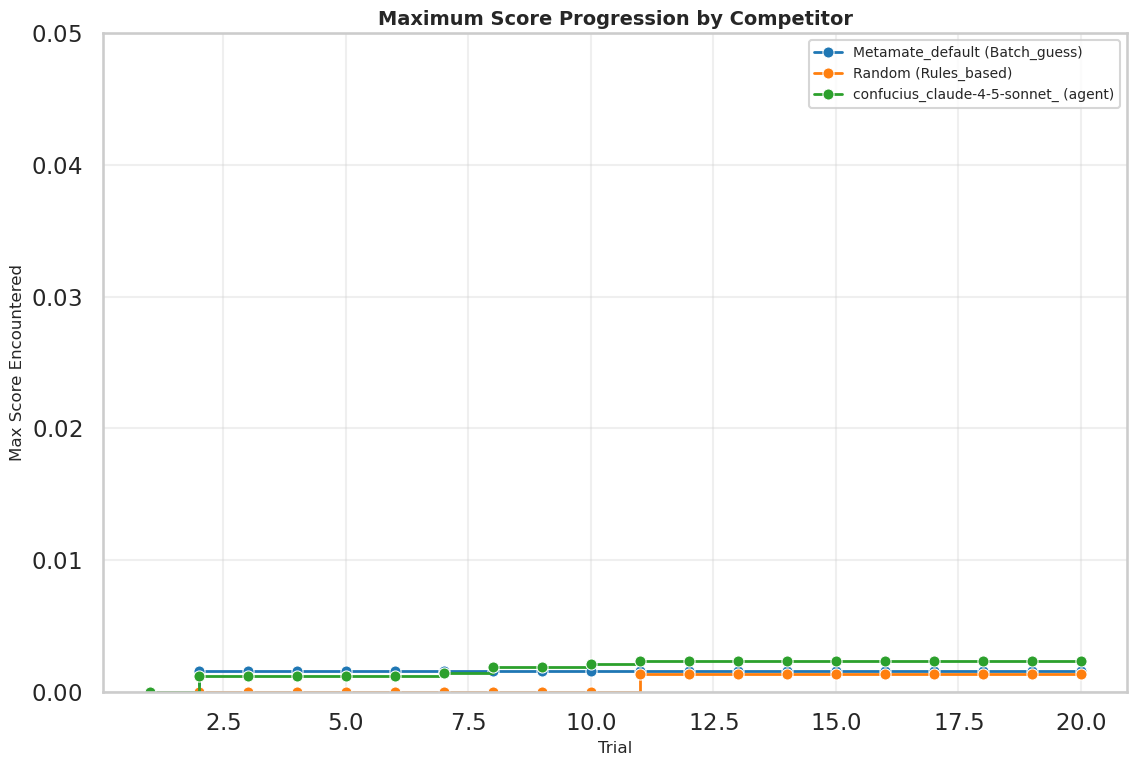

CONFIG_1


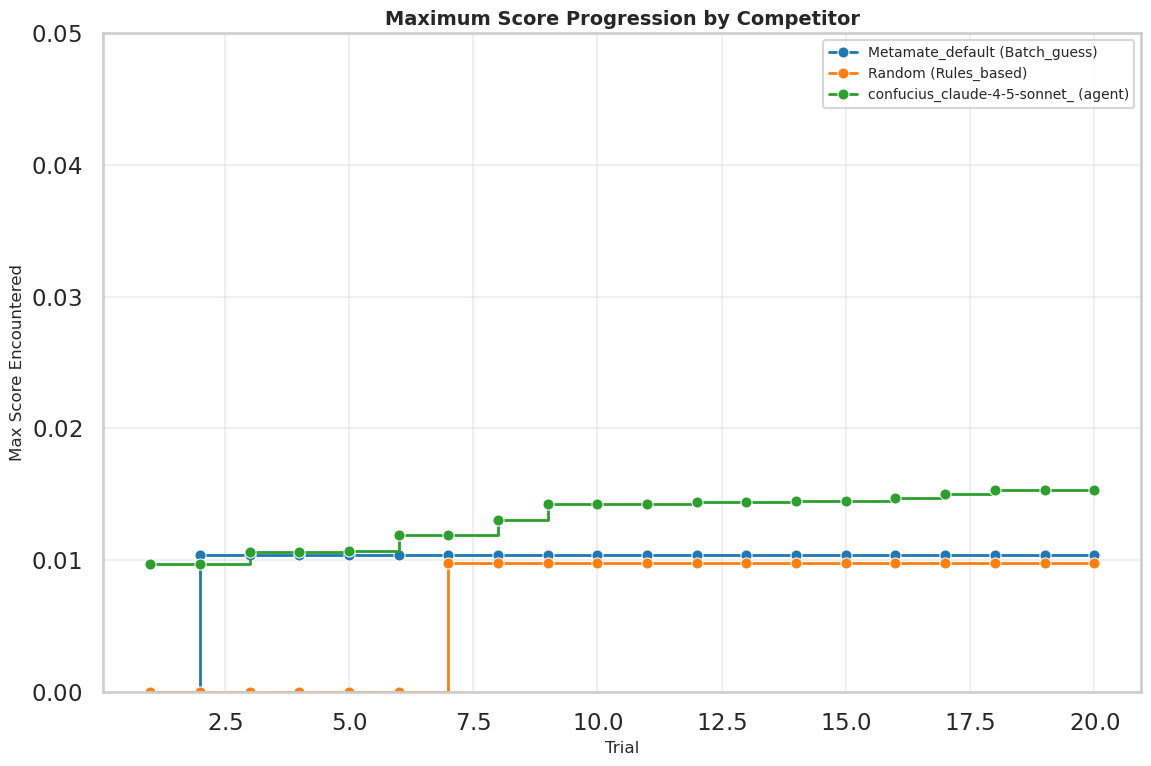

CONFIG_2


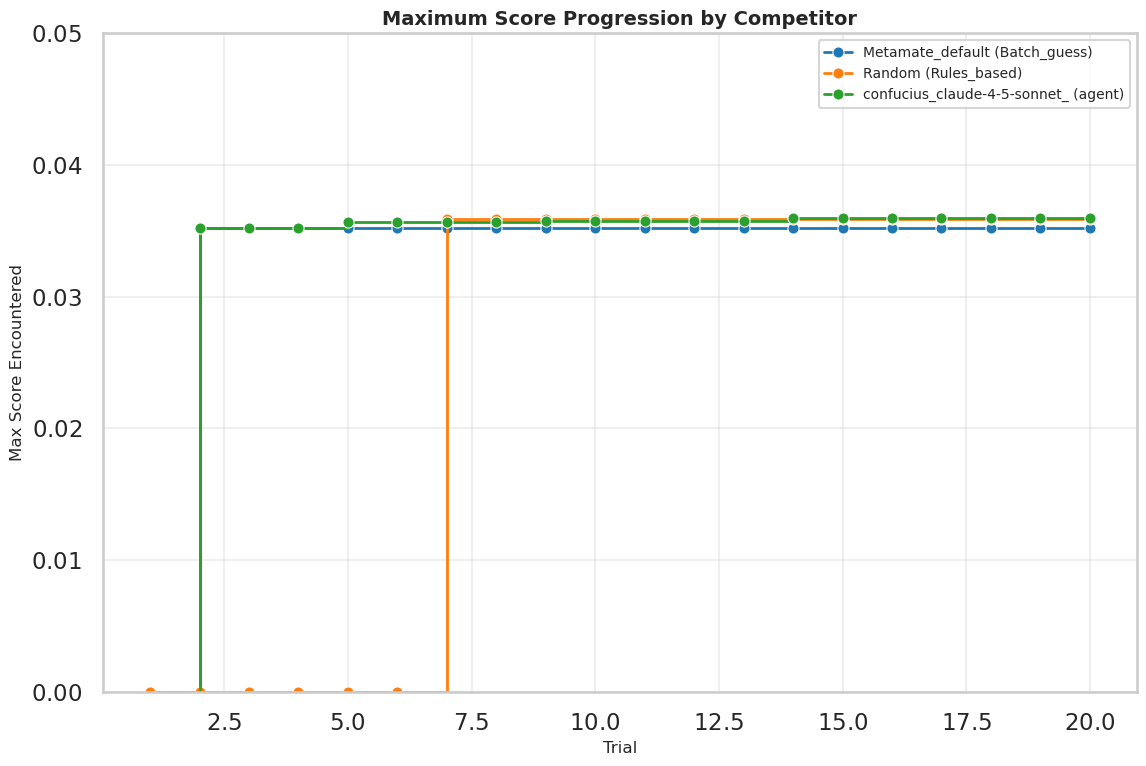

CONFIG_3


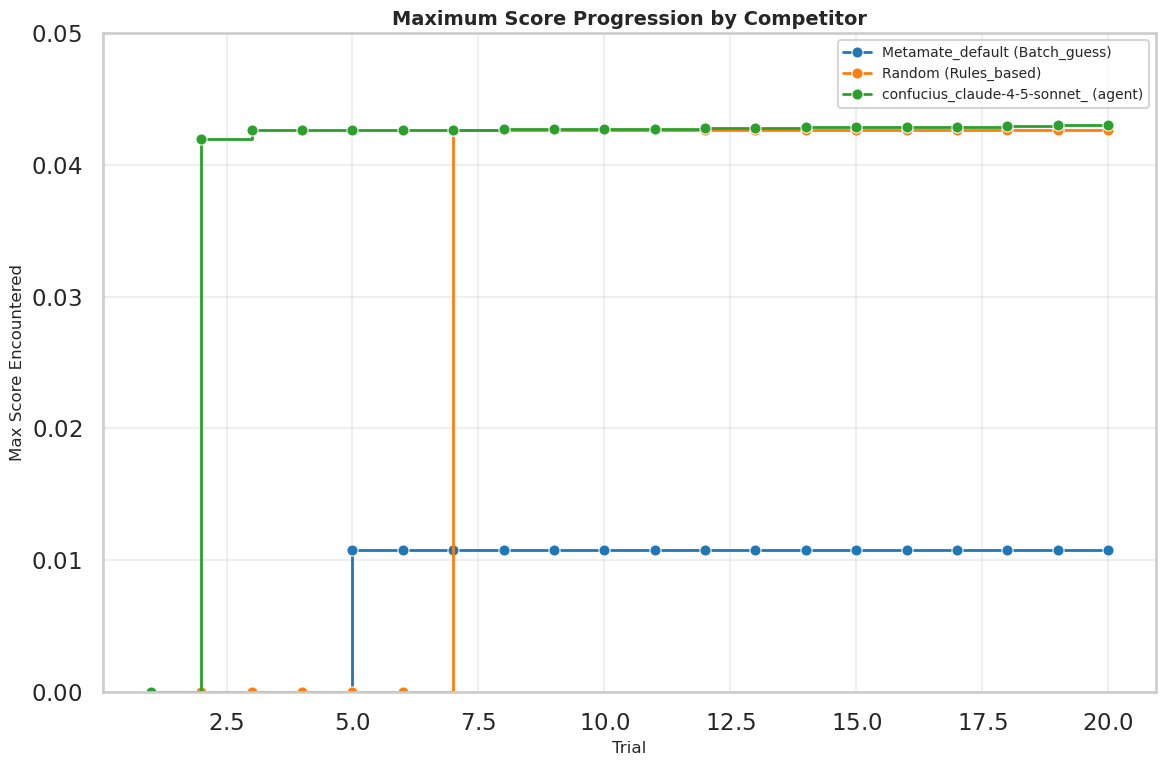

CONFIG_4


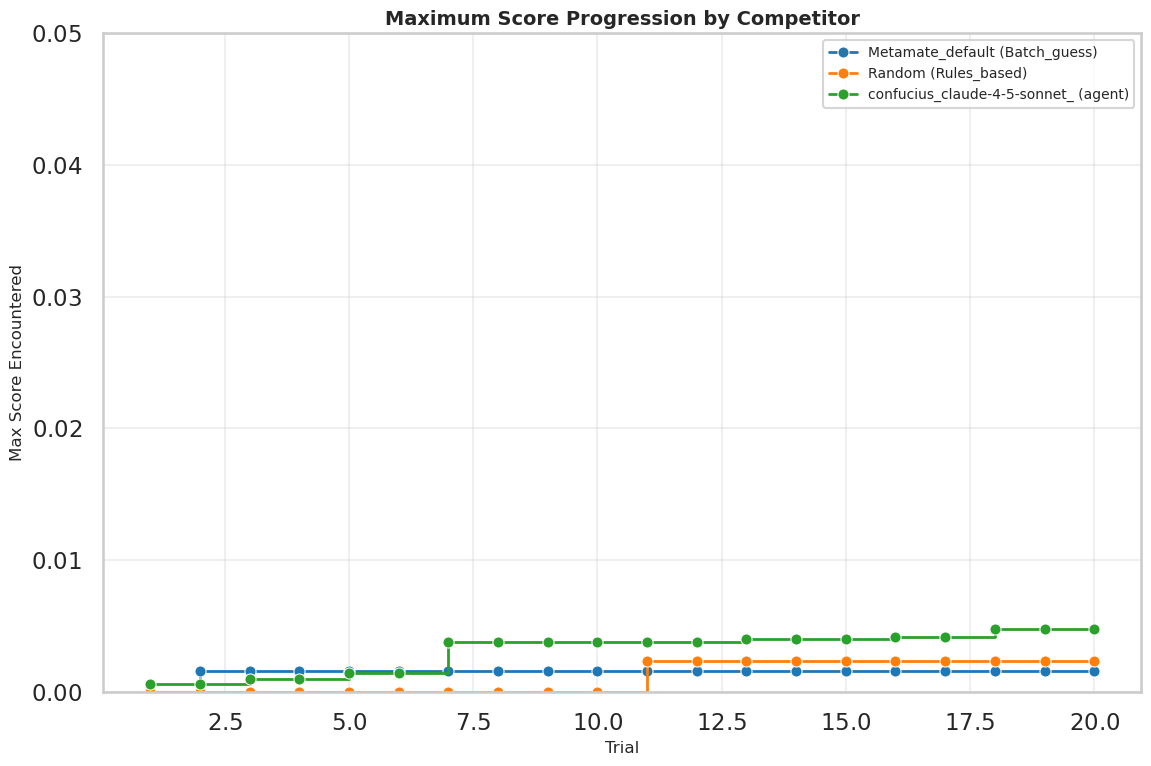

In [19]:
for k in config_keys:
    print(k)
    temp_pd = combined_df[combined_df.config_key == k]
    plot_max_score_progression(temp_pd)
    plt.show()

In [2627]:


def create_leaderboard(df: pd.DataFrame, min_qps: float =3500) -> pd.DataFrame:
    """
    Create a leaderboard of competitors based on their best trial with QPS > threshold.
    
    Args:
        df: DataFrame with columns ['Competitor', 'Type', 'Trial', 'score', 'qps']
        min_qps: Minimum QPS threshold (default: 3500)
    
    Returns:
        DataFrame with columns ['Rank', 'Competitor', 'Type', 'Best_Score', 'Trial', 'QPS']
        sorted by score in descending order
    """
    # Filter trials with QPS > threshold
    filtered_df = df[df['qps'] > min_qps].copy()
    
    # Get the best trial for each competitor
    best_trials = filtered_df.loc[filtered_df.groupby('Competitor')['score'].idxmax()]
    
    # Sort by score descending and create ranking
    leaderboard = best_trials.sort_values('score', ascending=False).reset_index(drop=True)
    
    # Add rank column
    leaderboard.insert(0, 'Rank', range(1, len(leaderboard) + 1))
    
    # Select and rename columns for clarity
    leaderboard = leaderboard[['Rank', 'Competitor', 'Type', 'score', 'Trial', 'qps', 'ARCH']]
    leaderboard = leaderboard.rename(columns={
        'score': 'Best_Score',
        'Trial': 'Best_Trial',
        'qps': 'QPS',
        'ARCH': 'ARCH'
    })
    
    return leaderboard
    
    


In [2646]:
k = "CONFIG_0"
temp_df = combined_df[combined_df.config_key == k]
leader_board =create_leaderboard(temp_df)


#for idx, row in leader_board.iterrows():
#    print(row['Competitor'])
#    print(row['ARCH'])
leader_board.head(10)

,Rank,Competitor,Type,Best_Score,Best_Trial,QPS,ARCH
0,1,confucius_claude-4-5-sonnet_,agent,0.002080,17,6028.275595,"[[2048, 2048], [1024, 1024], [2112, 2112], [15..."
1,2,Metamate_default,Batch_guess,0.001553,2,7322.552732,"[[2048, 2048], [1024, 1024], [2048, 2048], [10..."
2,3,Random,Rules_based,0.001365,11,7810.076498,"[[2880, 576, 960, 576], [1664, 256, 1856], [24..."


In [2684]:
k = "CONFIG_1"
temp_df = combined_df[combined_df.config_key == k]
leader_board =create_leaderboard(temp_df)

for idx, row in leader_board.iterrows():
    print(row['Competitor'])
    print(row['ARCH'])
leader_board.head(10)

confucius_claude-4-5-sonnet_
[[2048, 2048, 2048, 2048], [512, 512], [2048, 2048, 2048, 2048, 2048], [1024], [1024]]
Metamate_default
[[2048, 2048], [1024, 1024], [2048, 2048], [1024], [1024]]
Random
[[960, 768], [3328, 832], [1728], [3072, 384, 1216, 320], [2624, 1152]]


,Rank,Competitor,Type,Best_Score,Best_Trial,QPS,ARCH
0,1,confucius_claude-4-5-sonnet_,agent,0.013841,16,6000.693760,"[[2048, 2048, 2048, 2048], [512, 512], [2048, ..."
1,2,Metamate_default,Batch_guess,0.010409,2,8035.386657,"[[2048, 2048], [1024, 1024], [2048, 2048], [10..."
2,3,Random,Rules_based,0.009745,7,6375.750117,"[[960, 768], [3328, 832], [1728], [3072, 384, ..."


In [2703]:
k = "CONFIG_2"
temp_df = combined_df[combined_df.config_key == k]
leader_board =create_leaderboard(temp_df)

for idx, row in leader_board.iterrows():
    print(row['Competitor'])
    print(row['ARCH'])
leader_board.head(10)

confucius_claude-4-5-sonnet_
[[1536, 1536], [768, 768], [2048, 2048, 2048, 2048, 2048], [1536, 1536], [1536]]
Random
[[960, 768], [3328, 832], [1728], [3072, 384, 1216, 320], [2624, 1152]]
Metamate_default
[[2048, 2048], [1024, 1024], [2048, 2048], [1024], [1024]]


,Rank,Competitor,Type,Best_Score,Best_Trial,QPS,ARCH
0,1,confucius_claude-4-5-sonnet_,agent,0.039006,17,6211.328416,"[[1536, 1536], [768, 768], [2048, 2048, 2048, ..."
1,2,Random,Rules_based,0.035877,7,6495.119878,"[[960, 768], [3328, 832], [1728], [3072, 384, ..."
2,3,Metamate_default,Batch_guess,0.035192,2,7130.445318,"[[2048, 2048], [1024, 1024], [2048, 2048], [10..."


In [2705]:
k = "CONFIG_3"
temp_df = combined_df[combined_df.config_key == k]
leader_board =create_leaderboard(temp_df)

for idx, row in leader_board.iterrows():
    print(row['Competitor'])
    print(row['ARCH'])
leader_board.head(10)

Random
[[960, 768], [3328, 832], [1728], [3072, 384, 1216, 320], [2624, 1152]]
confucius_claude-4-5-sonnet_
[[1920, 1920], [896, 896], [1920, 1920], [1024], [1024]]
Metamate_default
[[2048, 1024], [1024, 512], [2048, 1024], [1024], [1024]]


,Rank,Competitor,Type,Best_Score,Best_Trial,QPS,ARCH
0,1,Random,Rules_based,0.042631,7,6959.702841,"[[960, 768], [3328, 832], [1728], [3072, 384, ..."
1,2,confucius_claude-4-5-sonnet_,agent,0.041518,11,6168.149777,"[[1920, 1920], [896, 896], [1920, 1920], [1024..."
2,3,Metamate_default,Batch_guess,0.010780,5,9043.419439,"[[2048, 1024], [1024, 512], [2048, 1024], [102..."


In [2707]:
k = "CONFIG_4"
temp_df = combined_df[combined_df.config_key == k]
leader_board =create_leaderboard(temp_df)
for idx, row in leader_board.iterrows():
    print(row['Competitor'])
    print(row['ARCH'])
leader_board.head(10)

confucius_claude-4-5-sonnet_
[[2048, 2048, 2048, 2048, 2048], [512, 512], [2048, 2048], [1024], [1024]]
Random
[[2880, 576, 960, 576], [1664, 256, 1856], [2496, 192, 1152], [832, 896], [192, 2112, 2304]]
Metamate_default
[[2048, 2048], [1024, 1024], [2048, 2048], [1024], [1024]]


,Rank,Competitor,Type,Best_Score,Best_Trial,QPS,ARCH
0,1,confucius_claude-4-5-sonnet_,agent,0.004338,8,6077.879610,"[[2048, 2048, 2048, 2048, 2048], [512, 512], [..."
1,2,Random,Rules_based,0.002342,11,6828.761045,"[[2880, 576, 960, 576], [1664, 256, 1856], [24..."
2,3,Metamate_default,Batch_guess,0.001591,2,6440.238223,"[[2048, 2048], [1024, 1024], [2048, 2048], [10..."


In [ ]:
leader_board.to_csv("/home/jamoberg/leader_board.csv")

In [ ]:
combined_df.to_csv("/home/jamoberg/combined_df.csv")

In [ ]:
combined_df

In [ ]:
# get the row with highest score for competitor == Random

get_random_trials = combined_df[combined_df.Competitor == 'Random']
get_random_trials.head()



In [ ]:
get_best_random =get_random_trials.groupby(['config_key','Competitor']).max().reset_index()[['config_key','score']].rename(columns={'score':'best_random_score'})

In [ ]:
get_best_random

In [ ]:
extended_df =combined_df.merge(get_best_random, on=['config_key'], how='left')
extended_df['gain_from_random'] = (extended_df['score']-extended_df['best_random_score'])/extended_df['best_random_score']

In [ ]:
temp =extended_df[['config_key','Competitor','gain_from_random','Type']].groupby(['config_key','Type','Competitor']).max('gain_from_random').reset_index()
ck = 'CONFIG_0'
temp_pd=temp[temp.config_key ==ck].sort_values(by='gain_from_random',ascending=False)
temp_pd
#.sort_values(by='gain_from_random',ascending=False).reset_index()

In [ ]:
temp =extended_df[['config_key','Competitor','gain_from_random','Type']].groupby(['config_key','Type','Competitor']).max('gain_from_random').reset_index()
ck = 'CONFIG_1'
temp_pd=temp[temp.config_key ==ck].sort_values(by='gain_from_random',ascending=False)
temp_pd

In [ ]:
temp =extended_df[['config_key','Competitor','gain_from_random','Type']].groupby(['config_key','Type','Competitor']).max('gain_from_random').reset_index()
ck = 'CONFIG_2'
temp_pd=temp[temp.config_key ==ck].sort_values(by='gain_from_random',ascending=False)
temp_pd

In [ ]:
temp =extended_df[['config_key','Competitor','gain_from_random','Type']].groupby(['config_key','Type','Competitor']).max('gain_from_random').reset_index()
ck = 'CONFIG_3'
temp_pd=temp[temp.config_key ==ck].sort_values(by='gain_from_random',ascending=False)
temp_pd

In [ ]:
temp =extended_df[['config_key','Competitor','gain_from_random','Type']].groupby(['config_key','Type','Competitor']).max('gain_from_random').reset_index()
ck = 'CONFIG_4'
temp_pd=temp[temp.config_key ==ck].sort_values(by='gain_from_random',ascending=False)
temp_pd

In [ ]:
extended_df.columns
#for k in config_keys:
#print(k)
#temp_pd = extended_df[extended_df.config_key == k]
#temp_pd.plot(x='Trial',y='gain_from_random', kind='line',hue='Competitor',figsize=(12,8))
#temp_pd =extended_df[extended_df.config_key == k]
#    plot_gain_from_random_progression(temp_pd)
#    plt.show()

# Section for parsing the output from metamate

In [1]:
import pandas as pd

metamate = {
    "trial_1": {
        "is_valid": True,
        "nested_architecture": [[1024, 1024], [512, 512], [1024, 1024], [1024], [1024]],
        # // Baseline architecture for reference.
    },
    "trial_2": {
        "is_valid": True,
        "nested_architecture": [
            [2048, 2048],
            [1024, 1024],
            [2048, 2048],
            [1024],
            [1024],
        ],
        # // Larger layers for better accuracy, still reasonable QPS.
    },
    "trial_3": {
        "is_valid": True,
        "nested_architecture": [
            [4096, 4096],
            [2048, 2048],
            [4096, 4096],
            [2048],
            [2048],
        ],
        # // Maximal layer sizes, likely best NE, QPS may be borderline.
    },
    "trial_4": {
        "is_valid": True,
        "nested_architecture": [[512, 512], [256, 256], [512, 512], [256], [256]],
        # // Smaller layers for high QPS, but NE may be worse.
    },
    "trial_5": {
        "is_valid": True,
        "nested_architecture": [
            [2048, 1024],
            [1024, 512],
            [2048, 1024],
            [1024],
            [1024],
        ],
        # // Mixed large/small layers for balance.
    },
    "trial_6": {
        "is_valid": True,
        "nested_architecture": [
            [3072, 3072],
            [1536, 1536],
            [3072, 3072],
            [1536],
            [1536],
        ],
        # // High capacity, QPS just above threshold.
    },
    "trial_7": {
        "is_valid": True,
        "nested_architecture": [[128, 128], [64, 64], [128, 128], [64], [64]],
        # // Minimal layers for max QPS, but NE is likely poor.
    },
    "trial_8": {
        "is_valid": True,
        "nested_architecture": [[1024, 512], [512, 256], [1024, 512], [512], [512]],
        # // Slightly smaller than baseline, higher QPS.
    },
    "trial_9": {
        "is_valid": True,
        "nested_architecture": [
            [4096, 4096, 4096],
            [2048, 2048, 2048],
            [4096, 4096, 4096],
            [2048, 2048],
            [2048, 2048],
        ],
        # // Max layers and sizes, QPS may be borderline.
    },
    "trial_10": {
        "is_valid": True,
        "nested_architecture": [[1536, 1536], [768, 768], [1536, 1536], [768], [768]],
        # // Mid-range layers for balance.
    },
    "trial_11": {
        "is_valid": True,
        "nested_architecture": [[256, 256], [128, 128], [256, 256], [128], [128]],
        # // Small layers, high QPS, poor NE.
    },
    "trial_12": {
        "is_valid": True,
        "nested_architecture": [
            [3072, 2048],
            [1536, 1024],
            [3072, 2048],
            [1536],
            [1536],
        ],
        # // Large layers, QPS above threshold.
    },
    "trial_13": {
        "is_valid": True,
        "nested_architecture": [
            [4096, 4096, 4096, 4096, 4096],
            [4096, 4096, 4096, 4096, 4096],
            [4096, 4096, 4096, 4096, 4096],
            [4096, 4096, 4096, 4096, 4096],
            [4096, 4096, 4096, 4096, 4096],
        ],
        #    // Absolute max architecture, QPS may be borderline, best NE.
    },
    "trial_14": {
        "is_valid": True,
        "nested_architecture": [
            [1024, 1024, 1024],
            [512, 512, 512],
            [1024, 1024, 1024],
            [512, 512],
            [512, 512],
        ],
        #   // More layers, moderate sizes.
    },
    "trial_15": {
        "is_valid": True,
        "nested_architecture": [
            [2048, 2048, 2048],
            [1024, 1024, 1024],
            [2048, 2048, 2048],
            [1024, 1024],
            [1024, 1024],
        ],
        #  // High capacity, QPS valid.
    },
    "trial_16": {
        "is_valid": True,
        "nested_architecture": [
            [512, 512, 512],
            [256, 256, 256],
            [512, 512, 512],
            [256, 256],
            [256, 256],
        ],
        # // More layers, small sizes, high QPS.
    },
    "trial_17": {
        "is_valid": True,
        "nested_architecture": [
            [3072, 3072, 3072],
            [1536, 1536, 1536],
            [3072, 3072, 3072],
            [1536, 1536],
            [1536, 1536],
        ],
        # // Large layers, more depth, QPS valid.
    },
    "trial_18": {
        "is_valid": True,
        "nested_architecture": [
            [128, 128, 128],
            [64, 64, 64],
            [128, 128, 128],
            [64, 64],
            [64, 64],
        ],
        # // Minimal layers and sizes, max QPS, worst NE.
    },
    "trial_19": {
        "is_valid": True,
        "nested_architecture": [
            [2048, 1024, 512],
            [1024, 512, 256],
            [2048, 1024, 512],
            [1024, 512],
            [1024, 512],
        ],
        # // Gradually decreasing layer sizes for balance.
    },
    "trial_20": {
        "is_valid": True,
        "nested_architecture": [
            [4096, 4096, 4096, 4096],
            [2048, 2048, 2048, 2048],
            [4096, 4096, 4096, 4096],
            [2048, 2048, 2048],
            [2048, 2048, 2048],
        ],
        # // Near-max layers and sizes, QPS just above threshold.
    },
}

metamamate_pd = pd.DataFrame(metamate).transpose()
metamamate_pd["Trial"] = metamamate_pd.index.str.split("_").str[1].astype(int)
metamamate_pd["ARCH"] = metamamate_pd["nested_architecture"].apply(lambda x: str(x))
metamamate_pd["qps"] = 0
metamamate_pd["ne"] = 0
metamamate_pd["Competitor"] = "Metamate_default"
metamamate_pd["score"] = 0
metamamate_pd.to_csv("/home/jamoberg/metamate_v2.csv")

metmate_20 = metamamate_pd[metamamate_pd.Trial <= 20]
metmate_20.to_csv("/home/jamoberg/metamate_v2_20.csv")

# Generates the random data

In [2494]:
import random
import pandas as pd
nr_trials = 20

nr_subarches = 5
max_nr_layers = 5
min_nr_layers = 1
random_dict = {}
l = list(range(64, 4096 + 64, 64))
i = 0
while len(random_dict) < nr_trials:
    trial_list = []
    for j in range(nr_subarches):
        rand_layers = random.randint(min_nr_layers, max_nr_layers)
        subarch_list = []
        for k in range(rand_layers):
            subarch_list.append(random.choice(l))
        trial_list.append(subarch_list)
    
   # bs, qps, _ = api.train_model(arch=trial_list, training_days=60, ignore_budget=True)
    
    random_dict["trial_" + str(i + 1)] = {"nested_architecture": trial_list}
    i += 1

random_pd = pd.DataFrame(random_dict).transpose()
random_pd["Trial"] = random_pd.index.str.split("_").str[1].astype(int)
random_pd["ARCH"] = random_pd["nested_architecture"].apply(lambda x: str(x))
random_pd["qps"] = 0
random_pd["ne"] = 0
random_pd["Competitor"] = "Random"
random_pd["score"] = 0
#random_pd.to_csv("/home/jamoberg/random_v2_20.csv")

In [6]:
random_pd

,nested_architecture,Trial,ARCH,qps,ne,Competitor,score
trial_1,"[[2944], [3776], [3392], [3008, 4096, 2112, 14...",1,"[[2944], [3776], [3392], [3008, 4096, 2112, 14...",0,0,Random,0
trial_2,"[[512, 2432, 3328, 1216], [3968, 3520], [3840,...",2,"[[512, 2432, 3328, 1216], [3968, 3520], [3840,...",0,0,Random,0
trial_3,"[[3264, 2880, 704], [1920, 1792, 4032, 2880, 2...",3,"[[3264, 2880, 704], [1920, 1792, 4032, 2880, 2...",0,0,Random,0
trial_4,"[[2624, 3840], [2240, 3008, 1792], [2368, 3008...",4,"[[2624, 3840], [2240, 3008, 1792], [2368, 3008...",0,0,Random,0
trial_5,"[[1728, 384, 768, 192], [3904, 256, 4032], [83...",5,"[[1728, 384, 768, 192], [3904, 256, 4032], [83...",0,0,Random,0
trial_6,"[[384, 448, 3968], [576, 1472, 448, 1216, 2560...",6,"[[384, 448, 3968], [576, 1472, 448, 1216, 2560...",0,0,Random,0
trial_7,"[[1152, 896, 4032, 2560, 3392], [2944, 1536, 3...",7,"[[1152, 896, 4032, 2560, 3392], [2944, 1536, 3...",0,0,Random,0
trial_8,"[[3136, 3200, 1344, 1024], [960, 1472], [1920,...",8,"[[3136, 3200, 1344, 1024], [960, 1472], [1920,...",0,0,Random,0
trial_9,"[[960, 1472], [64, 3392, 1088, 3648], [2944], ...",9,"[[960, 1472], [64, 3392, 1088, 3648], [2944], ...",0,0,Random,0
trial_10,"[[3008, 1088, 2176, 1344, 3584], [2304, 256, 3...",10,"[[3008, 1088, 2176, 1344, 3584], [2304, 256, 3...",0,0,Random,0
